# Age VS Smoker Prediction

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv(r'C:\Users\hp\Downloads\dataset for ml\insurance_dataset.csv', nrows=100)
smoke=df['smoker'].replace({'yes':1, 'no': 0}).values
age=df['age'].values
newdf=pd.DataFrame({"age":age, "smoke":smoke})
newdf

C:\Users\hp\AppData\Local\Temp\ipykernel_4892\4235217254.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  smoke=df['smoker'].replace({'yes':1, 'no': 0}).values


,age,smoke
0,46,1
1,25,1
2,38,1
3,25,0
4,49,1
...,...,...
95,54,0
96,58,0
97,43,1
98,46,0


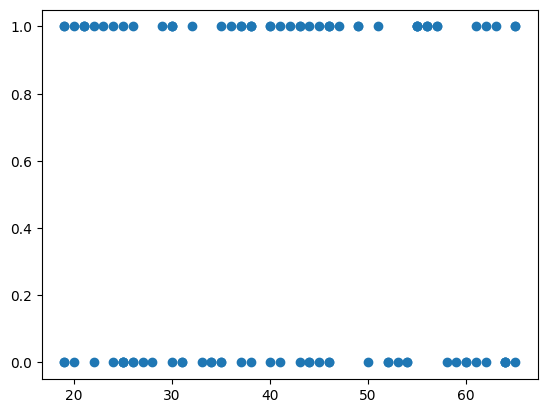

In [22]:
plt.scatter(x="age", y="smoke", data=newdf)

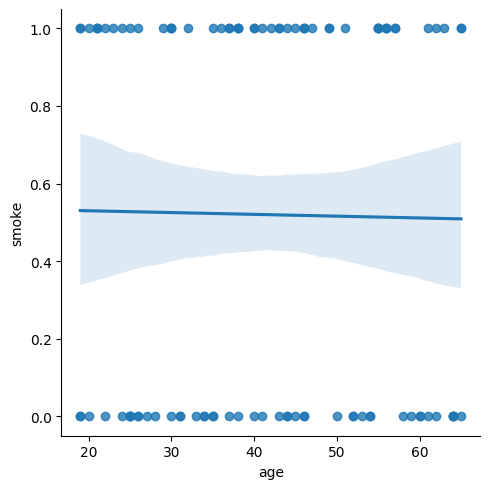

In [24]:
# checking variance for linear regression
sns.lmplot(x="age", y="smoke", data=newdf)

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(newdf[["age"]], newdf["smoke"], test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
lr.predict([[7]])

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# logistic prediction model multi independent inputs

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv(r"C:\Users\hp\Downloads\dataset for ml\insurance_dataset.csv", nrows=102)
data

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,NaN,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,NaN,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,NaN,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
97,43,female,29.34,0,yes,northwest,Heart disease,NaN,Never,Unemployed,Premium,19707.685171
98,46,male,33.60,5,no,southeast,High blood pressure,NaN,Occasionally,Blue collar,Premium,15882.202199
99,21,female,25.93,0,yes,southwest,Diabetes,High blood pressure,Frequently,Unemployed,Premium,18513.614310
100,29,female,47.74,2,no,northwest,NaN,High blood pressure,Rarely,Student,Premium,12561.917926


In [145]:
membership=data['coverage_level'].unique()
data['coverage_level'].replace({'Premium':0, 'Standard':1, 'Basic':2}, inplace=True)
data['smoker'].replace({'yes':1, 'no':0}, inplace=True)
data['gender'].replace({'male':0, 'female':1}, inplace=True)
membership
# 0->premium, yes, male
# 1->standard, no, female
# 2->basic

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train ,y_test=train_test_split(data[['age', 'gender', 'smoker']], data['coverage_level'], test_size=0.2)


lr=LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [110]:
lr.predict(x_test)

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0, 2])

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train1, x_test1, y_train1 ,y_test1 = train_test_split(data[['age', 'gender', 'smoker']], data['charges'], test_size=0.2)
lr1=LinearRegression()

lr1.fit(x_train1, y_train1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [138]:
def pridiction(age, gender, issmoke):
    gender1=1
    issmoke1=1
    if gender=='male':
        gender1=0
    if issmoke =='no':
        issmoke1=0
        
    idx=lr.predict([[age, gender1, issmoke1]])[0]
    plan=membership[idx]
    price=lr1.predict([[age, gender1, issmoke1]])
    return plan, float(price[0])

# insurance price prediction model using logistic regression

In [146]:
age=int(input("enter your age: "))
gender=input("male or female: ")
issmoke=input("did you smoke yes or no: ")
plan, price=pridiction(age, gender, issmoke)
print(f'plan reequired: {plan}, price {price}rs')

enter your age:  18
male or female:  male
did you smoke yes or no:  yes


plan reequired: Basic, price 18171.640826743143rs


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
